<a href="https://colab.research.google.com/github/shubhamnawani99/stocks-analysis/blob/master/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#2.1 importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [91]:
#defining path and reading csv file
path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/week2.csv"
df = pd.read_csv(path)

#deleting the redundant column
del df['Unnamed: 0']
df.dtypes

Date                      object
Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity    float64
Month                      int64
Year                       int64
VWAP                     float64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [93]:
#converting date from type:object to type:datetime64[ns]
if df.Date.dtype != '<M8[ns]':
  df.Date = df.Date.apply(pd.to_datetime)
df.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity           float64
Month                             int64
Year                              int64
VWAP                            float64
Day_Perc_Change                 float64
Trend                            object
dtype: object

In [0]:
#setting index as Date
df.set_index('Date', inplace = True)
df.head()

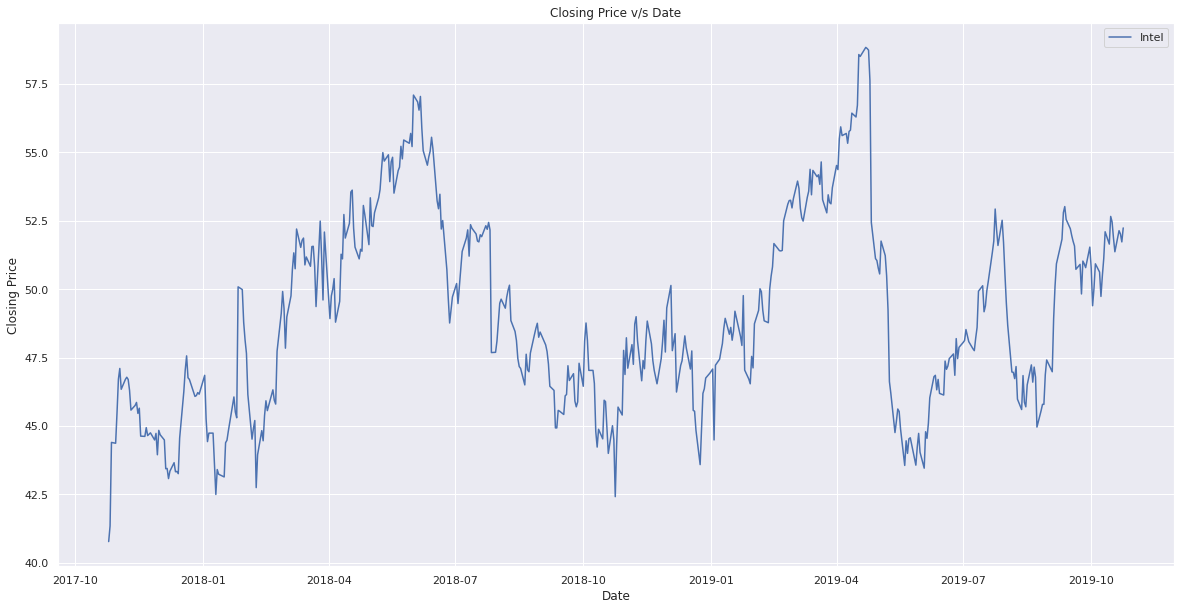

In [106]:
#plotting closing price w.r.t. date for the chosen stock
plt.figure(figsize = (20,10))
plt.plot(df.index, df['Close Price'].tolist())
plt.title("Closing Price v/s Date")
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.legend(["Intel"])

In [21]:
#sorting the closing prices in descending order
df['Close Price'].diff().abs().sort_values(ascending = False)

Date
2019-04-25    5.18
2018-01-25    4.78
2018-07-26    4.48
2018-03-29    3.16
2018-03-23    3.12
              ... 
2019-08-27    0.00
2018-09-11    0.00
2018-01-05    0.00
2018-10-05    0.00
2019-10-24     NaN
Name: Close Price, Length: 503, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

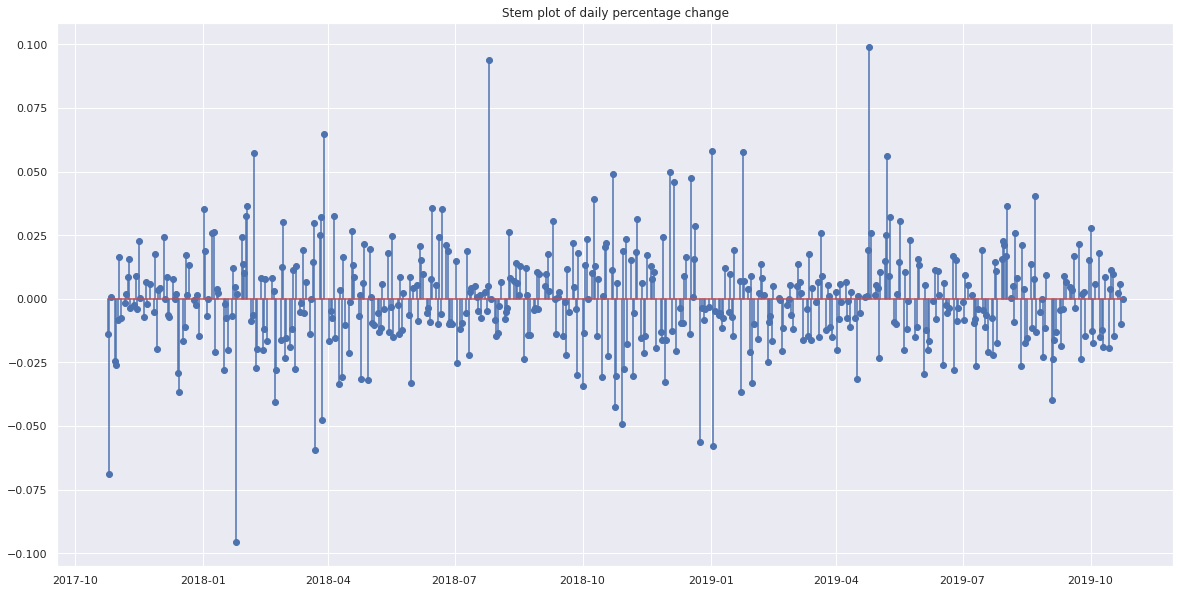

In [113]:
#2.2 Stem plot of daily percentage change in stock price
plt.figure(figsize=(20,10))
plt.title("Stem plot of daily percentage change")
plt.stem(df.index, df['Day_Perc_Change'])

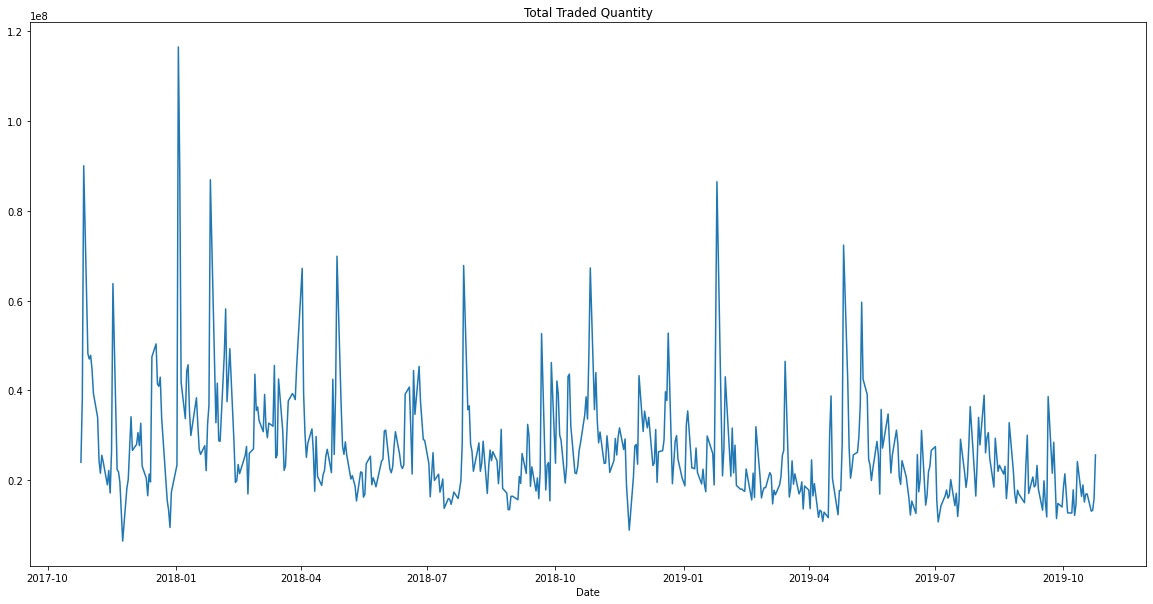

In [23]:
#2.3 Plot of daily volume and comparision to percentage stem plot
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Total Traded Quantity')
ax.set_xlabel('Date')
ax.plot(df['Total Traded Quantity'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


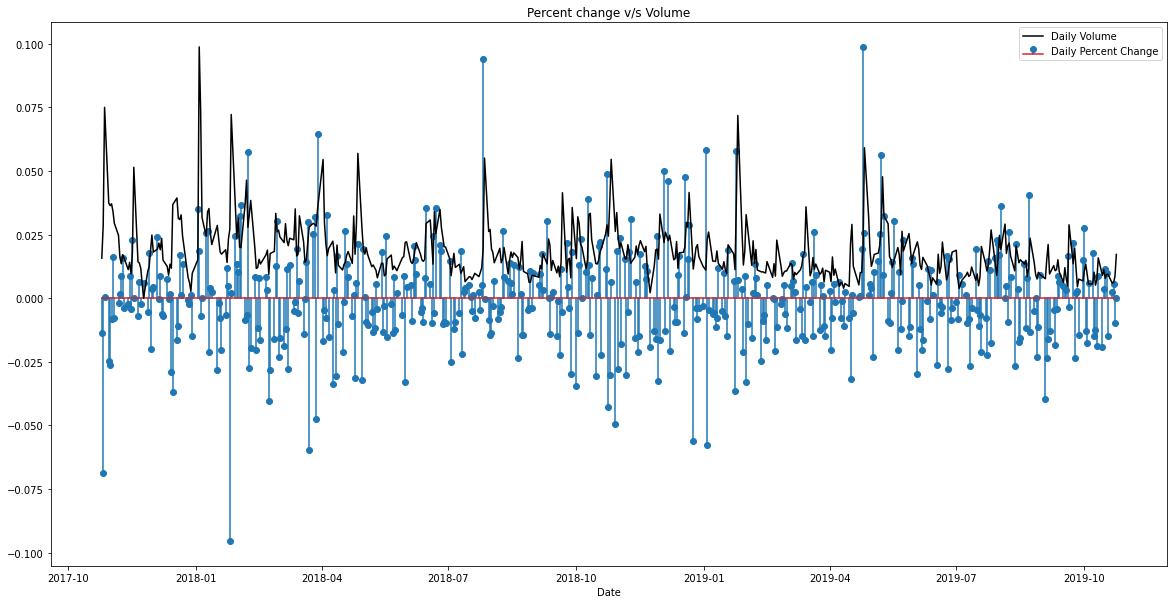

In [24]:
ScaledVol =  df["Total Traded Quantity"] - df["Total Traded Quantity"].min()
ScaledVol = ScaledVol/ScaledVol.max() * df.Day_Perc_Change.max()
fig, ax = plt.subplots(figsize=(20, 10))

ax.stem(df.index, df.Day_Perc_Change, label='Daily Percent Change')
ax.plot(df.index, ScaledVol,'k', label='Daily Volume')
ax.set_title('Percent change v/s Volume')
ax.set_xlabel('Date')
plt.legend(loc=1)

plt.show()

In [25]:
#2.4 to count the frequency of different trends in the dataframe
from collections import Counter 
Trends = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = df['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 503})

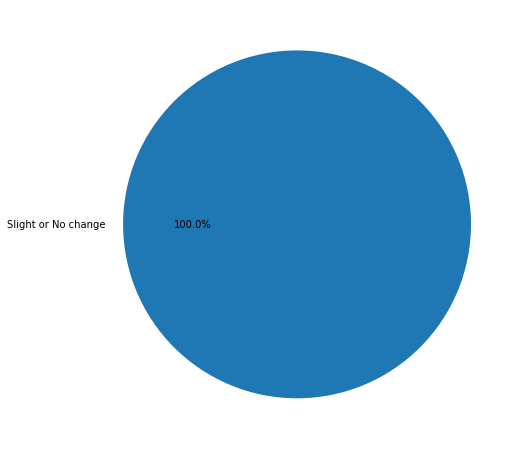

In [26]:
#to display the pie chart with different trend percentages
values = []
labels = []
for key in counts:  
  values.append(counts[key])
  labels.append(key)
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.show()

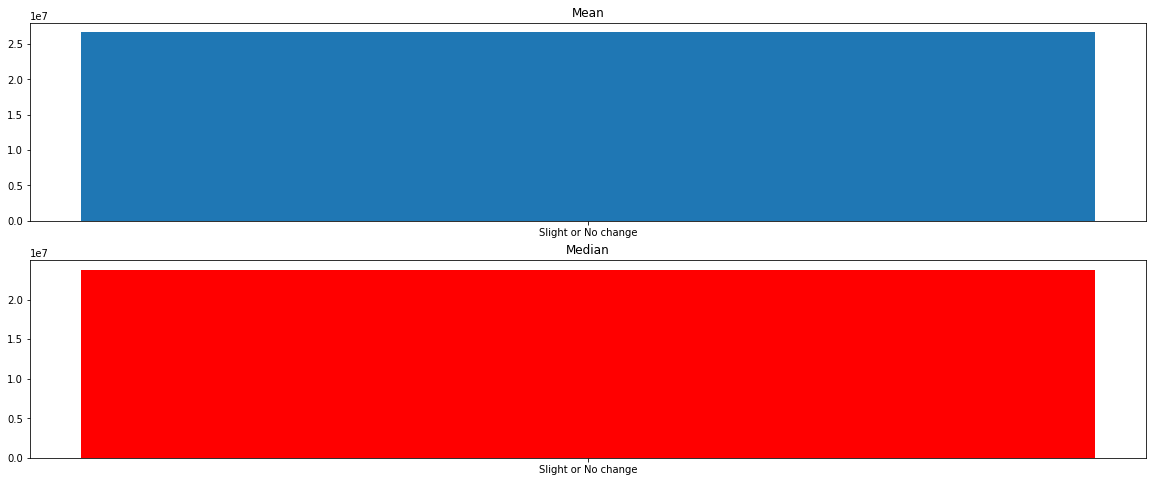

In [27]:
#to display the mean and median of diffrent trends
group_by_mean = df.groupby(['Trend'])['Total Traded Quantity'].mean()
group_by_median = df.groupby(['Trend'])['Total Traded Quantity'].median()
fig, a = plt.subplots(2, figsize = (20,8))
a[0].bar(key,group_by_mean)
a[0].set_title("Mean")
a[1].bar(key,group_by_median,color = 'r')
a[1].set_title("Median")
plt.show()

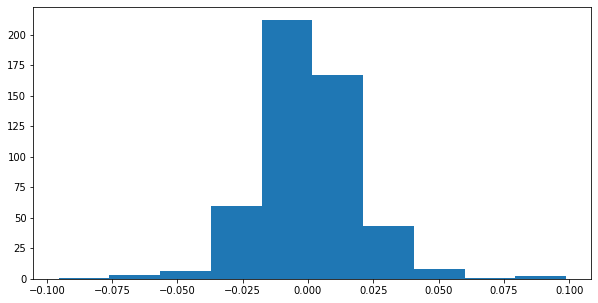

In [28]:
#2.5 Plotting daily percentage changes as a histogram
plt.figure(figsize=(10,5))
plt.hist(df['Day_Perc_Change'])
plt.show()

In [35]:
#2.6 Analysis of corelation of stocks
#defining the paths for stock files
INFY_PATH = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/INFY.csv'
RELIANCE_PATH = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/RELIANCE.csv'
TATA_PATH = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Mid_Cap/TATAPOWER.csv'
AXIS_PATH = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/AXISBANK.csv'
TITAN_PATH = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/TITAN.csv'

#reading all the .csv files
infy_data = pd.read_csv(INFY_PATH)
reliance_data = pd.read_csv(RELIANCE_PATH)
tata_data = pd.read_csv(TATA_PATH)
axis_data = pd.read_csv(AXIS_PATH)
titan_data = pd.read_csv(TITAN_PATH)

#keeping only the 'EQ' series
infy = infy_data[infy_data.Series == 'EQ']
reliance = reliance_data[reliance_data.Series == 'EQ']
tata = tata_data[tata_data.Series == 'EQ']
axis = axis_data[axis_data.Series == 'EQ']
titan = titan_data[titan_data.Series == 'EQ']

#defining the column headings
companies = [infy,reliance,tata,axis,titan]
cols = ['INFY','RELIANCE','TATA','AXIS_BANK','TITAN']

#defining the dataframe of closing price for the chosen 5 companies
close_prices = pd.DataFrame()

#adding data to respective columns
for x, y in zip(cols, companies):
  close_prices[x] = y['Close Price']

#setting the Date as index
close_prices['Date'] = pd.to_datetime(tata["Date"])
close_prices = close_prices.set_index('Date')

#dropping the NaN terms
close_prices = close_prices.dropna()
close_prices

,INFY,RELIANCE,TATA,AXIS_BANK,TITAN
Date,,,,,
2017-05-15,951.55,1344.10,83.55,500.10,483.65
2017-05-16,955.00,1356.30,83.85,501.50,488.30
2017-05-17,952.80,1353.10,85.35,502.80,481.75
2017-05-18,961.75,1327.35,83.75,492.00,471.65
2017-05-19,957.95,1318.85,84.15,501.70,471.15
...,...,...,...,...,...
2019-05-07,718.40,1343.50,64.35,741.85,1082.85
2019-05-08,724.55,1299.45,64.50,735.50,1086.50
2019-05-09,719.35,1256.45,64.40,731.00,1088.70


In [37]:
#calculating percentage changes and dropping the NaN values
perc_change = close_prices.pct_change().dropna()
close_prices = close_prices[1:]
perc_change

,INFY,RELIANCE,TATA,AXIS_BANK,TITAN
Date,,,,,
2017-05-16,0.003626,0.009077,0.003591,0.002799,0.009614
2017-05-17,-0.002304,-0.002359,0.017889,0.002592,-0.013414
2017-05-18,0.009393,-0.019030,-0.018746,-0.021480,-0.020965
2017-05-19,-0.003951,-0.006404,0.004776,0.019715,-0.001060
2017-05-22,0.003654,0.004019,-0.024955,0.001196,0.021755
...,...,...,...,...,...
2019-05-07,-0.007186,-0.029894,-0.022779,-0.007492,-0.054321
2019-05-08,0.008561,-0.032787,0.002331,-0.008560,0.003371
2019-05-09,-0.007177,-0.033091,-0.001550,-0.006118,0.002025


In [0]:
#2.6 import seaborn to analyse corelation between percentage changes of the five stocks
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(perc_change)

In [46]:
#2.7 Calculation of 7 day rolling average of percentage change of any stock price
rolling_tata = perc_change['TATA'].rolling(7).mean()
rolling_tata

Date
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
                ...   
2019-05-07   -0.007378
2019-05-08   -0.006834
2019-05-09   -0.007478
2019-05-10   -0.008598
2019-05-13   -0.008757
Name: TATA, Length: 489, dtype: float64

In [47]:
#calculation of standard deviation
std_tata = rolling_tata.fillna(0).std()
std_tata

0.007035709038688817

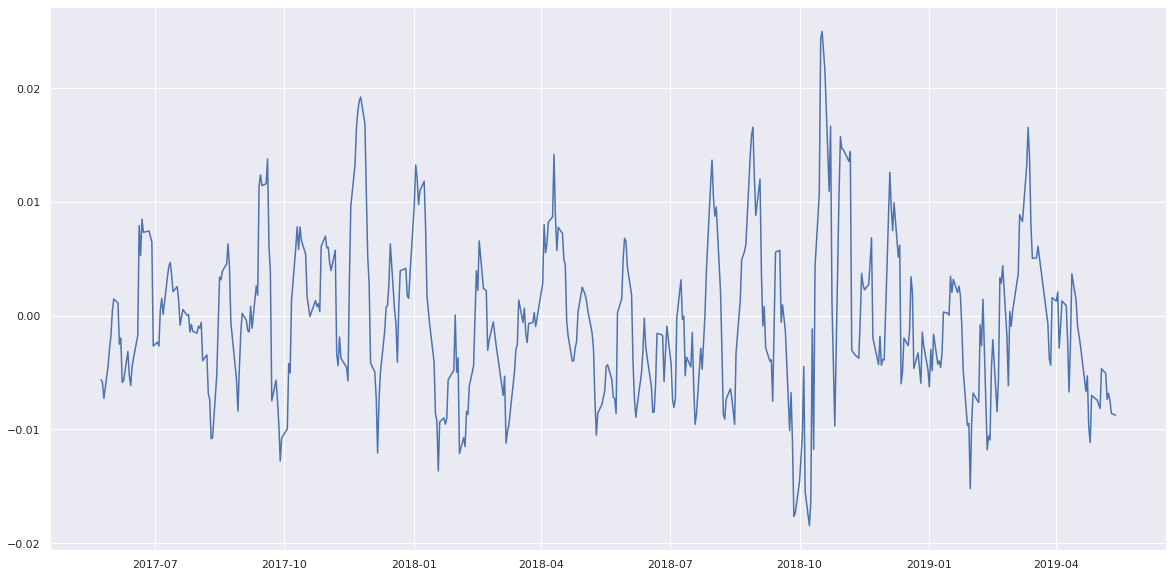

In [62]:
#plotting the values
crr_date = pd.to_datetime(close_prices.index)
date_list = crr_date.tolist()
plt.figure(figsize=(20,10))
plt.plot(date_list,rolling_tata.tolist())
plt.show()
#2.7 end

In [59]:
#2.8 Calculation of volatility of Nifty Index
nifty_path = 'https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Nifty50/Nifty50.csv'
nifty = pd.read_csv(nifty_path)
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


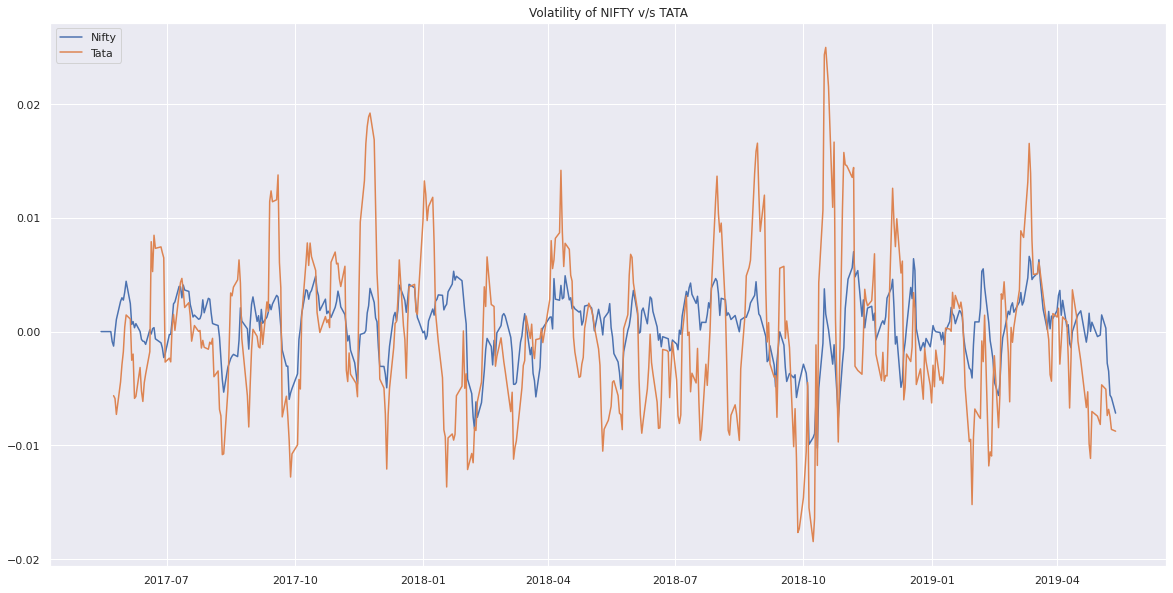

In [61]:
#Comparision of Nifty with the chosen stock
nif_close_price = nifty['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nifty['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

plt.title("Volatility of NIFTY v/s TATA")
plt.plot(nifDate,nif_change.tolist(),label = 'Nifty')
plt.plot(date_list,rolling_tata.tolist(),label = 'Tata')
plt.legend(loc='upper left')
plt.show()

In [63]:
#2.9 Plotting 21 day and 34 day Moving Average
short_window = 21
long_window = 34

signals = pd.DataFrame(index=tata.index)
signals['signal'] = 0.0

signals['short_mavg'] = tata['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

signals['long_mavg'] = tata['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

signals['positions'] = signals['signal'].diff()

print(signals)

     signal  short_mavg  long_mavg  positions
0       0.0   83.550000  83.550000        NaN
1       0.0   83.700000  83.700000        0.0
2       0.0   84.250000  84.250000        0.0
3       0.0   84.125000  84.125000        0.0
4       0.0   84.130000  84.130000        0.0
..      ...         ...        ...        ...
490     0.0   69.583333  70.798529        0.0
491     0.0   69.252381  70.547059        0.0
492     0.0   68.950000  70.270588        0.0
493     0.0   68.561905  69.998529        0.0
494     0.0   68.119048  69.692647        0.0

[494 rows x 4 columns]


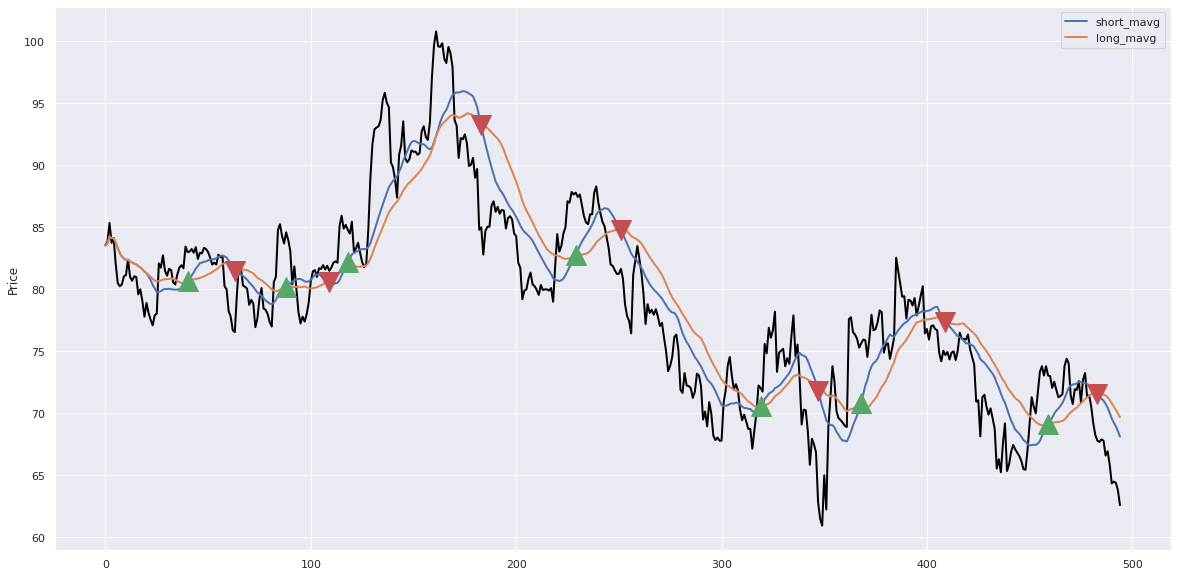

In [66]:
#Deciding a call
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel='Price')
tata['Close Price'].plot(ax=ax1, color='black', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

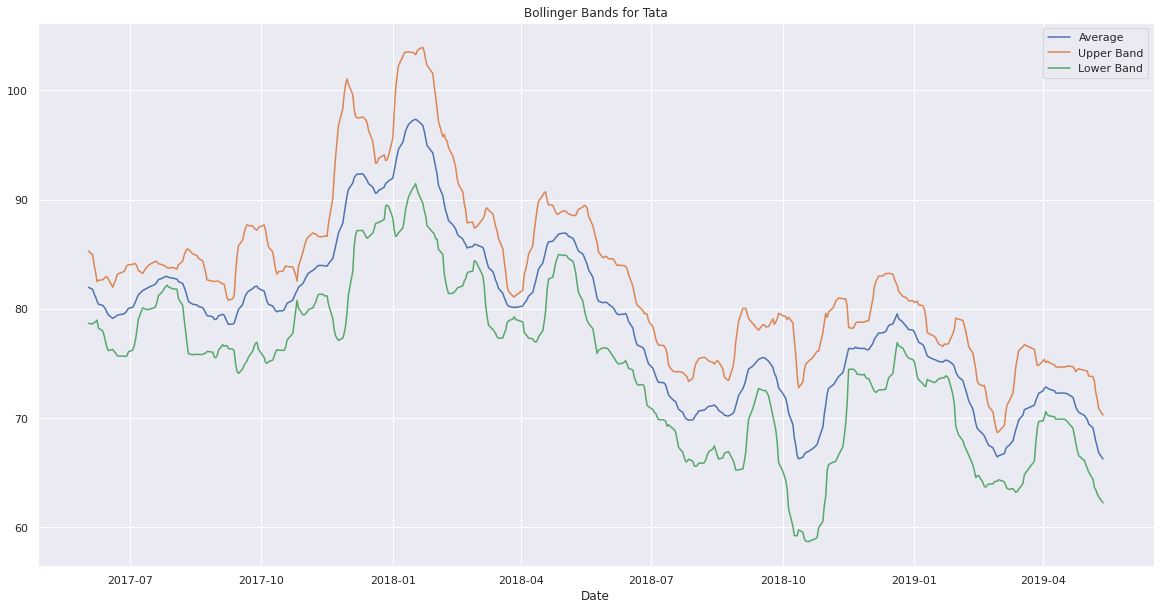

In [88]:
#2.10 Plotting Bollinger Bands for this stock
data = pd.DataFrame()
symbol = 'TATA'

#calculating rolling mean(14) of closing price
sma = close_prices[symbol].rolling(14).mean()
data["Average"] = sma

rstd = close_prices[symbol].rolling(14).std()

#calculating upper and lower bands
data["Upper Band"] =  sma + 2 * rstd
data["Lower Band"] = sma - 2 * rstd

labels = ["Average", "Upper Band", "Lower Band"]

plt.figure(figsize = (20,10))
plt.plot(date_list, data)
plt.xlabel('Date')
plt.title('Bollinger Bands for Tata')
plt.legend(labels)

plt.show()

#saving to a new csv file
close_prices.to_csv("week3.csv")